In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")

In [3]:
eth_data = yf.download('ETH-USD', start='2020-01-01', end='2023-12-31')

# Display the first few rows of the data
eth_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [4]:
# Calculate the features (using only closing prices here for simplicity)
eth_data['Return'] = eth_data['Adj Close'].pct_change().dropna()
eth_data['LogReturn'] = np.log1p(eth_data['Adj Close']).diff().dropna()
eth_data = eth_data.dropna()

# Define the feature matrix (X) and target vector (y)
X = eth_data[['Return', 'LogReturn']].values
y = eth_data['Adj Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()


In [6]:
# Initialize the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=100, gamma=0.1)

In [8]:
# Make predictions on the test set
y_pred_scaled = svr.predict(X_test_scaled)

# Reshape the predictions to a 2D array before inverse transforming
y_pred_scaled = y_pred_scaled.reshape(-1, 1)  # Reshape to 2D

# Inverse transform the scaled predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1143207.78
Mean Absolute Error: 821.50


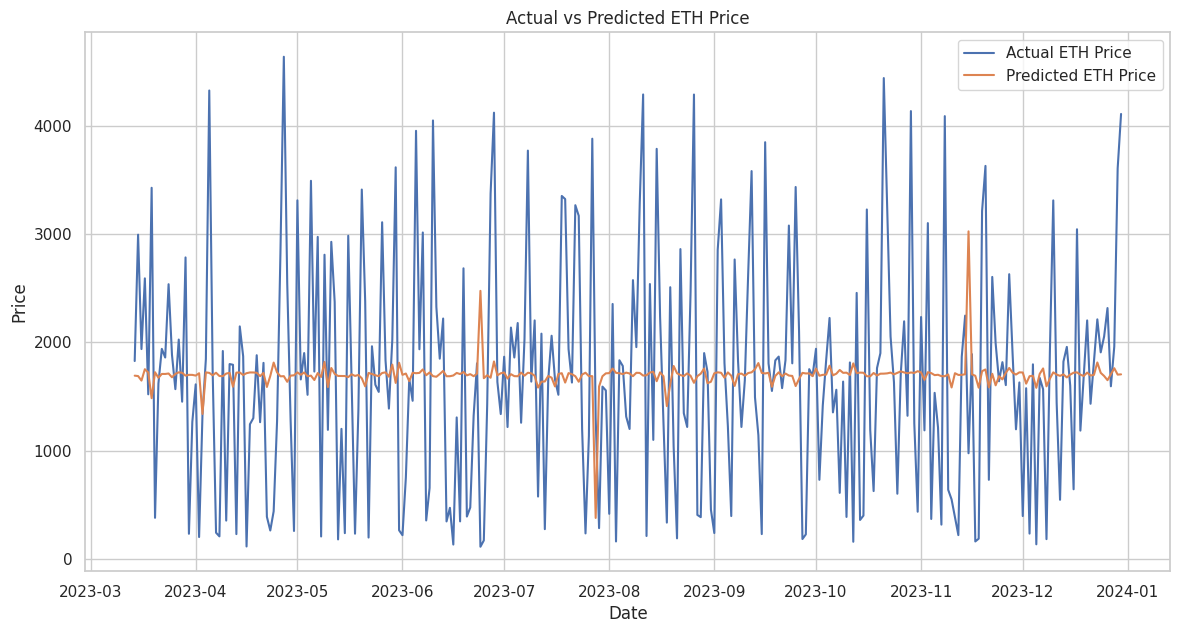

In [9]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(eth_data.index[-len(y_test):], y_test, label='Actual ETH Price')
plt.plot(eth_data.index[-len(y_test):], y_pred, label='Predicted ETH Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted ETH Price')
plt.legend()
plt.show()
